# GEOSPATIAL ANALYSIS PROJECT

### Abdullah MEMISOGLU

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocess

In [4]:
df = pd.read_csv('zomato.csv')

In [5]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [8]:
df.shape

(51717, 17)

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
feature_na = [feature for feature in df.columns if df[feature].isnull().sum() > 0]
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [12]:
for feature in feature_na:
    print('{} has {} missing values'.format(feature, df[feature].isnull().sum()/len(df) * 100,4))

rate has 15.033741322969234 missing values
phone has 2.335789005549432 missing values
location has 0.04060560357329312 missing values
rest_type has 0.438927238625597 missing values
dish_liked has 54.29162557766305 missing values
cuisines has 0.08701200765705668 missing values
approx_cost(for two people) has 0.669025658874258 missing values


In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
df.dropna(axis = 'index', subset = ['rate'], inplace = True)

In [15]:
df.shape

(43942, 17)

In [16]:
def split(x):
    return x.split('/')[0]

In [17]:
df['rate'] = df['rate'].apply(split)

In [18]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table rate  votes                             phone  \
0          Yes        Yes  4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1    787                      080 41714161   
2          Yes         No  3.8    918                    +91 9663487993   
3           No         No  3.7     88                    +91 9620009302   
4           No         No  3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [19]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

## IN-DEPTH Analysis of Restaurant 

In [20]:
df.replace('NEW', 0, inplace = True)

In [21]:
df.replace('-', 0, inplace = True)

In [22]:
df['rate'].dtype

dtype('O')

In [25]:
df['rate'] = df['rate'].astype(float)

In [26]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [27]:
df['rate'].dtype

dtype('float64')

In [28]:
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
2          Yes         No   3.8    918                    +91 9663487993   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [36]:
df_rate = df.groupby('name')['rate'].mean().to_frame().reset_index()

df_rate.columns = ['restaurant', 'avg_rating']

df_rate.head()

restaurant  avg_rating
0                          #FeelTheROLL         3.4
1                            #L-81 Cafe         3.9
2                               #refuel         3.7
3                              1000 B.C         3.2
4  100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C         3.7

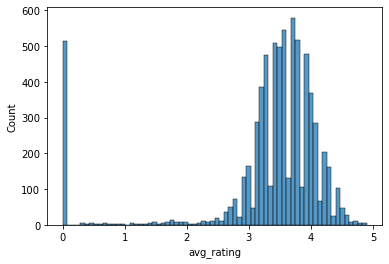

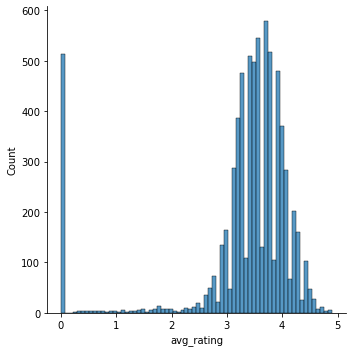

In [41]:
sns.histplot(df_rate['avg_rating'])
sns.displot(df_rate['avg_rating'])

In [45]:
df_rate.shape

(7162, 2)

In [46]:
chains = df['name'].value_counts()[0:20]

Text(0.5, 0, 'Number of Outlets')

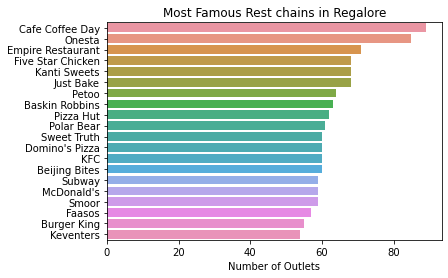

In [50]:
sns.barplot(x = chains, y = chains.index)

plt.title('Most Famous Rest chains in Regalore')

plt.xlabel('Number of Outlets')

In [55]:
x = df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [53]:
import plotly.express as px

In [57]:
labels = ['accepted', 'not accepted']

In [59]:
px.pie(df, values = x, labels = labels, title = 'Pie Chart' )

# Most Famous Restaurants


In [67]:
x = df['book_table'].value_counts()
x

No     37509
Yes     6433
Name: book_table, dtype: int64

In [68]:
labels = ['not book', 'book']

In [69]:
import plotly.graph_objs as go
from plotly.offline import iplot

In [70]:
trace = go.Pie(labels = labels, values = x, hoverinfo = 'label + percent',
       textinfo = 'value')
iplot([trace])

In [81]:
df['rest_type'].isna().sum()

151

In [90]:
df['rest_type'].dropna(inplace = True)

In [91]:
df['rest_type'].isna().sum()

151

In [84]:
len(df['rest_type'].unique())

88

In [96]:
trace1 = go.Bar(x = df['rest_type'].value_counts().nlargest(20).index,
      y = df['rest_type'].value_counts().nlargest(20).index)

In [97]:
iplot([trace1])

<AxesSubplot:xlabel='name'>

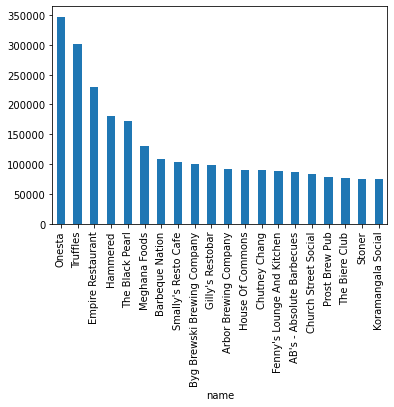

In [98]:
df.groupby('name')['votes'].sum().nlargest(20).plot.bar()

In [99]:
trace2 = go.Bar(x = df.groupby('name')['votes'].sum().nlargest(20).index,
      y = df.groupby('name')['votes'].sum().nlargest(20))
iplot([trace2])

In [100]:
restaurant = []
location = []

for key,location_df in df.groupby('location'):
    location.append(key)
    restaurant.append(len(location_df['name'].unique()))

In [101]:
df_total = pd.DataFrame(zip(location,restaurant))

df_total.head()

0    1
0                BTM  581
1       Banashankari  238
2          Banaswadi  151
3  Bannerghatta Road  362
4       Basavanagudi  195

In [102]:
df_total.columns = ['location', 'restaurant']

df_total.head()

location  restaurant
0                BTM         581
1       Banashankari         238
2          Banaswadi         151
3  Bannerghatta Road         362
4       Basavanagudi         195

In [103]:
df_total.set_index('location', inplace = True)

In [104]:
df_total.head()

restaurant
location                     
BTM                       581
Banashankari              238
Banaswadi                 151
Bannerghatta Road         362
Basavanagudi              195

<AxesSubplot:xlabel='location'>

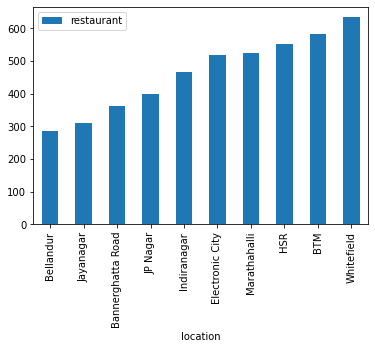

In [108]:
df_total.sort_values(by = 'restaurant').tail(10).plot.bar()

## Price of Restaurants

In [109]:
cuisines = df['cuisines'].value_counts()[0:10]

cuisines 

North Indian                           2294
North Indian, Chinese                  2060
South Indian                           1320
Cafe                                    653
Bakery, Desserts                        644
Biryani                                 641
South Indian, North Indian, Chinese     601
Fast Food                               580
Desserts                                572
Chinese                                 449
Name: cuisines, dtype: int64

In [110]:
trace3 = go.Bar(x = df['cuisines'].value_counts()[0:10].index,
       y = df['cuisines'].value_counts()[0:10] )
iplot([trace3])

In [112]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [113]:
df['approx_cost(for two people)'].isna().sum()

252

In [114]:
df.dropna(axis = 'index', subset = ['approx_cost(for two people)'], inplace = True)

In [115]:
df['approx_cost(for two people)'].isna().sum()

0

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='Count'>

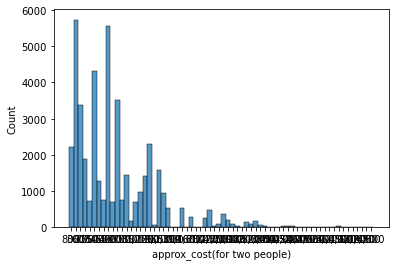

In [117]:
sns.histplot(df['approx_cost(for two people)'])

In [118]:
df['approx_cost(for two people)'].dtype

dtype('O')

In [119]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [120]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',',''))

In [122]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '1700', '1400', '1350', '2200', '2000', '1800',
       '1900', '180', '330', '2500', '2100', '3000', '2800', '3400', '50',
       '40', '1250', '3500', '4000', '2400', '2600', '1450', '70', '3200',
       '560', '240', '360', '6000', '1050', '2300', '4100', '120', '5000',
       '3700', '1650', '2700', '4500'], dtype=object)

In [124]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(int)

In [126]:
df['approx_cost(for two people)'].dtype

dtype('int32')

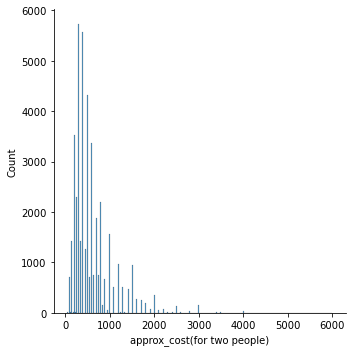

In [128]:
sns.displot(df['approx_cost(for two people)'])

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

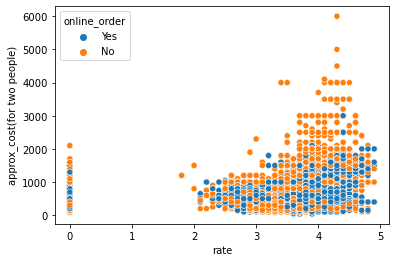

In [131]:
sns.scatterplot(x = 'rate', y = 'approx_cost(for two people)',hue = 'online_order', data = df)

<AxesSubplot:xlabel='online_order', ylabel='votes'>

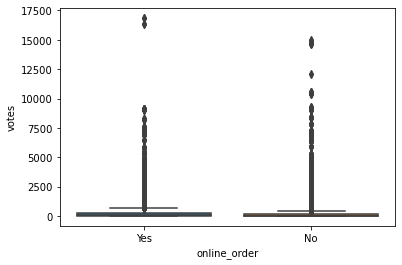

In [132]:
sns.boxplot(x = 'online_order', y = 'votes', data = df)

In [134]:
px.box(df, x = 'online_order', y = 'votes')

In [135]:
px.box(df, x = 'online_order', y = 'approx_cost(for two people)')

## Analysing from Restaurant Pattern

In [136]:
df['approx_cost(for two people)'].min()

40

In [137]:
df['approx_cost(for two people)'].max()

6000

In [138]:
df[df['approx_cost(for two people)'] == 6000]['name']

19139    Le Cirque Signature - The Leela Palace
45618    Le Cirque Signature - The Leela Palace
Name: name, dtype: object

In [139]:
data = df.copy()

In [141]:
data.set_index('name',inplace = True)

In [142]:
data.head()

url  \
name                                                                       
Jalsa                  https://www.zomato.com/bangalore/jalsa-banasha...   
Spice Elephant         https://www.zomato.com/bangalore/spice-elephan...   
San Churro Cafe        https://www.zomato.com/SanchurroBangalore?cont...   
Addhuri Udupi Bhojana  https://www.zomato.com/bangalore/addhuri-udupi...   
Grand Village          https://www.zomato.com/bangalore/grand-village...   

                                                                 address  \
name                                                                       
Jalsa                  942, 21st Main Road, 2nd Stage, Banashankari, ...   
Spice Elephant         2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
San Churro Cafe        1112, Next to KIMS Medical College, 17th Cross...   
Addhuri Udupi Bhojana  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
Grand Village          10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   

                      online_order book_table  rate  votes  \
name                                                         
Jalsa                          Yes        Yes   4.1    775   
Spice Elephant                 Yes         No   4.1    787   
San Churro Cafe                Yes         No   3.8    918   
Addhuri Udupi Bhojana           No         No   3.7     88   
Grand Village                   No         No   3.8    166   

                                                  phone      location  \
name                                                                    
Jalsa                    080 42297555\r\n+91 9743772233  Banashankari   
Spice Elephant                             080 41714161  Banashankari   
San Churro Cafe                          +91 9663487993  Banashankari   
Addhuri Udupi Bhojana                    +91 9620009302  Banashankari   
Grand Village          +91 8026612447\r\n+91 9901210005  Basavanagudi   

                                 rest_type  \
name                                         
Jalsa                        Casual Dining   
Spice Elephant               Casual Dining   
San Churro Cafe        Cafe, Casual Dining   
Addhuri Udupi Bhojana          Quick Bites   
Grand Village                Casual Dining   

                                                              dish_liked  \
name                                                                       
Jalsa                  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
Spice Elephant         Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
San Churro Cafe        Churros, Cannelloni, Minestrone Soup, Hot Choc...   
Addhuri Udupi Bhojana                                        Masala Dosa   
Grand Village                                        Panipuri, Gol Gappe   

                                             cuisines  \
name                                                    
Jalsa                  North Indian, Mughlai, Chinese   
Spice Elephant            Chinese, North Indian, Thai   
San Churro Cafe                Cafe, Mexican, Italian   
Addhuri Udupi Bhojana      South Indian, North Indian   
Grand Village                North Indian, Rajasthani   

                       approx_cost(for two people)  \
name                                                 
Jalsa                                          800   
Spice Elephant                                 800   
San Churro Cafe                                800   
Addhuri Udupi Bhojana                          300   
Grand Village                                  600   

                                                            reviews_list  \
name                                                                       
Jalsa                  [('Rated 4.0', 'RATED\n  A beautiful place to ...   
Spice Elephant         [('Rated 4.0', 'RATED\n  Had been here for din...   
San Churro Cafe        [('Rated 3.0', "RATED\n  Ambience is not that ...   
Addhuri Udupi Bhojana  [('Rated 4.0', "RA

Text(0.5, 1.0, '5 Most Expansive Restaurants')

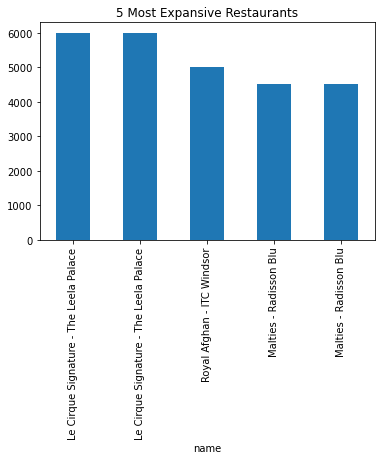

In [146]:
data['approx_cost(for two people)'].nlargest().plot.bar()
plt.title('5 Most Expansive Restaurants')

Text(0.5, 1.0, '10 Cheapest Restaurants')

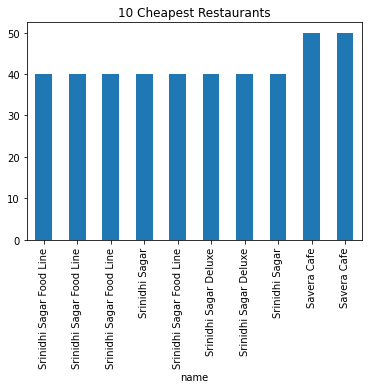

In [147]:
data['approx_cost(for two people)'].nsmallest(10).plot.bar()
plt.title('10 Cheapest Restaurants')

In [148]:
data[data['approx_cost(for two people)'] <= 500]

url  \
name                                                                                                    
Addhuri Udupi Bhojana                               https://www.zomato.com/bangalore/addhuri-udupi...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  https://www.zomato.com/bangalore/caf%C3%A9-dow...   
The Coffee Shack                                    https://www.zomato.com/bangalore/the-coffee-sh...   
Caf-Eleven                                          https://www.zomato.com/bangalore/caf-eleven-ba...   
T3H Cafe                                            https://www.zomato.com/bangalore/t3h-cafe-bana...   
...                                                                                               ...   
Venice Kerala Restaurant                            https://www.zomato.com/bangalore/venice-kerala...   
Thai & Chinese Fast Food                            https://www.zomato.com/bangalore/thai-chinese-...   
The Crunch                                          https://www.zomato.com/bangalore/the-crunch-br...   
Punjabi Charchay                                    https://www.zomato.com/bangalore/punjabi-charc...   
Raapchick                                           https://www.zomato.com/bangalore/raapchick-bro...   

                                                                                              address  \
name                                                                                                    
Addhuri Udupi Bhojana                               1st Floor, Annakuteera, 3rd Stage, Banashankar...   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley  12,29 Near PES University Back Gate, D'Souza N...   
The Coffee Shack                                        6th Block, 3rd Stage, Banashankari, Bangalore   
Caf-Eleven                                          111, Sapphire Toys Building, 100 Feet Ring Roa...   
T3H Cafe                                            504, CJ Venkata Das Road, Padmanabhangar, 2nd ...   
...                                                                                               ...   
Venice Kerala Restaurant                            Opposite Brookfield Mall, Shiva Temple Road, B...   
Thai & Chinese Fast Food                            7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
The Crunch                                            33/1, Kundalahalli Road, Brookefield, Bangalore   
Punjabi Charchay                                    7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...   
Raapchick                                           Opposite Brookefield Mall, Kundanhalli, Brooke...   

                                                   online_order book_table  \
name                                                                         
Addhuri Udupi Bhojana                                        No         No   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley          Yes         No   
The Coffee Shack                                            Yes        Yes   
Caf-Eleven                                                   No         No   
T3H Cafe                                                     No         No   
...                                                         ...        ...   
Venice Kerala Restaurant                                     No         No   
Thai & Chinese Fast Food                                     No         No   
The Crunch                                                   No         No   
Punjabi Charchay                                             No         No   
Raapchick                                                   Yes         No   

                                                    rate  votes  \
name                                                              
Addhuri Udupi Bhojana                                3.7     88   
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley   4.1    402   
The Coffee Shack                                     4.2    164   
Caf-Eleven      

In [152]:
df_budget = data[data['approx_cost(for two people)'] <= 500].loc[:,('approx_cost(for two people)')]

In [153]:
df_budget

name
Addhuri Udupi Bhojana                                 300
CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The Alley    500
The Coffee Shack                                      500
Caf-Eleven                                            450
T3H Cafe                                              300
                                                     ... 
Venice Kerala Restaurant                              200
Thai & Chinese Fast Food                              400
The Crunch                                            300
Punjabi Charchay                                      400
Raapchick                                             300
Name: approx_cost(for two people), Length: 26330, dtype: int32

In [154]:
df_budget = df_budget.reset_index()

df_budget.head()

name  \
0                              Addhuri Udupi Bhojana   
1  CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...   
2                                   The Coffee Shack   
3                                         Caf-Eleven   
4                                           T3H Cafe   

   approx_cost(for two people)  
0                          300  
1                          500  
2                          500  
3                          450  
4                          300

In [157]:
df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)].shape

(2436, 17)

In [158]:
df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]['name'].unique()

array(['CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â© Down The Alley',
       'The Coffee Shack', 'Faasos', 'Shree Cool Point',
       'Corner House Ice Cream', 'Kabab Magic', 'The Biryani Cafe',
       'Sri Guru Kottureshwara Davangere Benne Dosa', 'Frozen Bottle',
       'Bengaluru Coffee House', 'Sri Udupi Food Hub', 'BOX8- Desi Meals',
       'Roll Over', 'The Blue Wagon - Kitchen', 'HOT COFFEE',
       'Energy Addaa', 'Dev Sagar - Food Street', 'Shakes Theory',
       "Kedia's Fun Food", 'Mini Punjabi Dhaba', 'Twiststick House',
       'Cool Corner', 'Mystique Palate', 'Stoned Monkey', 'Karma Kaapi',
       'The Lassi Park', 'South Kitchen', 'Prems Graama Bhojanam',
       'Puliyogare Point', 'Udupi Ruchi Grand', 'Cafe Aira', 'Chai Kraft',
       'Karnataka Bhel House', 'Sreeraj Lassi Bar', 'Ayodhya Upachar',
       'Poonam Sweets', 'Taaza Thindi',
       'Sri Laxmi Venkateshwara Coffee Bar', 'SLV Refreshment',
       'Ranganna Military Hotel', '

In [160]:
len(df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]['name'].unique())

372

In [161]:
df_new = df[(df['rate'] > 4) & (df['approx_cost(for two people)'] <= 500)]
df_new

url  \
10     https://www.zomato.com/bangalore/caf%C3%A9-dow...   
12     https://www.zomato.com/bangalore/the-coffee-sh...   
34     https://www.zomato.com/bangalore/faasos-banash...   
51     https://www.zomato.com/bangalore/shree-cool-po...   
52     https://www.zomato.com/bangalore/corner-house-...   
...                                                  ...   
51312  https://www.zomato.com/bangalore/biryani-kitch...   
51313  https://www.zomato.com/bangalore/stoner-whitef...   
51345  https://www.zomato.com/bangalore/the-wok-shop-...   
51376  https://www.zomato.com/bangalore/nu-tree-1-whi...   
51437  https://www.zomato.com/bangalore/captain-egg-w...   

                                                 address  \
10     12,29 Near PES University Back Gate, D'Souza N...   
12         6th Block, 3rd Stage, Banashankari, Bangalore   
34     80, BDA Complex, 2nd Stage, Banashankari, Bang...   
51     1514, 4th Cross, 7th Main, RPC layout, 2nd Sta...   
52     808/6-1, 24th A Cross, K.R Road, 2nd Stage, Ba...   
...                                                  ...   
51312  FB 11, 1st Floor, Inorbit Mall, EPIP Area, Whi...   
51313  120/57, Ground Floor, Azeem's Gold Building, W...   
51345  S 26, 2nd Floor, Phoenix Market City, Whitefie...   
51376  12th Floor, Gamma Building, Sigma Soft Tech Pa...   
51437  V R Bengaluru Mall, Mahadevapura Main Rd, Whit...   

                                                    name online_order  \
10     CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...          Yes   
12                                      The Coffee Shack          Yes   
34                                                Faasos          Yes   
51                                      Shree Cool Point          Yes   
52                                Corner House Ice Cream           No   
...                                                  ...          ...   
51312                                    Biryani Kitchen          Yes   
51313                                             Stoner          Yes   
51345                                       The Wok Shop          Yes   
51376                                            nu.tree          Yes   
51437                                        Captain Egg           No   

      book_table  rate  votes                           phone      location  \
10            No   4.1    402  080 26724489\r\n+91 7406048982  Banashankari   
12           Yes   4.2    164                  +91 9731644212  Banashankari   
34            No   4.2    415                  +91 7700020020  Banashankari   
51            No   4.1     28                  +91 9900617124   Vijay Nagar   
52            No   4.3    345  080 26713965\r\n+91 9845444155  Banashankari   
...          ...   ...    ...                             ...           ...   
51312         No   4.3    634                    080 28029555    Whitefield   
51313         No   4.3    549                    080 49652126    Whitefield   
51345         No   4.2    221                  +91 8067266088    Whitefield   
51376         No   4.2     52                  +91 8310393035    Whitefield   
51437         No   4.1     18  +91 7622934444\n+91 9909000096    Whitefield   

                  rest_type  \
10                     Cafe   
12                     Cafe   
34              Quick Bites   
51              Quick Bites   
52           Dessert Parlor   
...                     ...   
51312            Food Court   
51313  Dessert Parlor, Cafe   
51345           Quick Bites   
51376           Quick Bites   
51437            Food Court   

                                              dish_liked  \
10     Waffles, Pasta, Crispy Chicken, Honey Chilli C...   
12     Coffee, Spaghetti, Pancakes, Nachos, Pasta, Sa...   
34     Rolls, Veggie Wrap, Chocolate Fantasy, Rice Bo...   
51                                                   NaN   
52     Hot Chocolate Fudge, Vanilla Ice Cream, Fudge ...   
...                                                 

In [163]:
location = []
total = []
for loc, location_df in df_new.groupby('location'):
    location.append(loc)
    total.append(len(location_df['name'].unique()))
    

In [164]:
location_df = pd.DataFrame(zip(location, total))

In [167]:
location_df.head()

0   1
0                BTM  28
1       Banashankari  16
2          Banaswadi   1
3  Bannerghatta Road   9
4       Basavanagudi  24

In [168]:
location_df.columns = ['location', 'restaurant']

In [169]:
location_df.head()

location  restaurant
0                BTM          28
1       Banashankari          16
2          Banaswadi           1
3  Bannerghatta Road           9
4       Basavanagudi          24

In [174]:
def return_budget(location, restaurant):
    budget_df = df[(df['approx_cost(for two people)'] <= 400) & (df['location'] == location) & (df['rate'] > 4) & (df['rest_type'] == restaurant)]
    return (budget_df['name'].unique())

In [175]:
return_budget('BTM', 'Quick Bites')

array(['Swadista Aahar', 'Litti Twist', 'The Shawarma Shop', 'Gorbandh',
       'Yum In My Tum', 'Chaatimes', "Muthashy's", 'Swad Punjab Da',
       "Domino's Pizza", 'Roti Wala', 'Andhra Kitchen'], dtype=object)

In [177]:
restaurant_location = df['location'].value_counts()[0:20]

<AxesSubplot:xlabel='location'>

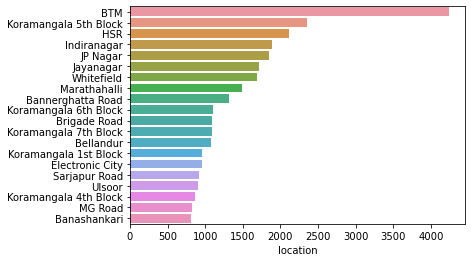

In [179]:
sns.barplot(x = restaurant_location, y = restaurant_location.index)

In [181]:
locations = pd.DataFrame({'Name':df['location'].unique()})

In [182]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

In [183]:
from geopy.geocoders import Nominatim

In [186]:
geolocator = Nominatim(user_agent = 'app') # To see documentation press shift + Tab

In [189]:
lat_lon = []
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:
        geo = (location.latitude,location.longitude)
        lat_lon.append(geo)

In [190]:
locations['geo_loc'] = lat_lon

In [192]:
locations.head()

Name                           geo_loc
0        Banashankari          (15.8876779, 75.7046777)
1        Basavanagudi          (12.9417261, 77.5755021)
2         Mysore Road          (12.3872141, 76.6669626)
3           Jayanagar  (27.64392675, 83.05280519687284)
4  Kumaraswamy Layout          (12.9081487, 77.5553179)

In [193]:
locations.shape

(92, 2)

In [194]:
Rest_locations = pd.DataFrame(df['location'].value_counts().reset_index())

In [195]:
Rest_locations.head()

index  location
0                    BTM      4237
1  Koramangala 5th Block      2358
2                    HSR      2113
3            Indiranagar      1892
4               JP Nagar      1849

In [196]:
Rest_locations.columns = ['Name', 'count']

In [197]:
Rest_locations.head()

Name  count
0                    BTM   4237
1  Koramangala 5th Block   2358
2                    HSR   2113
3            Indiranagar   1892
4               JP Nagar   1849

In [199]:
Restaurant_locations = Rest_locations.merge(locations, on = 'Name', how = 'left').dropna()

In [200]:
Restaurant_locations

Name  count                             geo_loc
0                     BTM   4237  (45.95485055, -112.49659530324134)
1   Koramangala 5th Block   2358             (12.9343774, 77.628415)
2                     HSR   2113                (18.1475, 41.538889)
3             Indiranagar   1892            (12.9732913, 77.6404672)
4                JP Nagar   1849            (12.2655944, 76.6465404)
..                    ...    ...                                 ...
87         West Bangalore      5            (13.0011289, 77.6325617)
88              Yelahanka      4            (13.1006982, 77.5963454)
89   Rajarajeshwari Nagar      2            (12.9274413, 77.5155224)
90                 Peenya      1            (13.0329419, 77.5273253)
91             Nagarbhavi      1            (12.9546741, 77.5121724)

[91 rows x 3 columns]

In [201]:
np.array(Restaurant_locations['geo_loc'])

array([(45.95485055, -112.49659530324134), (12.9343774, 77.628415),
       (18.1475, 41.538889), (12.9732913, 77.6404672),
       (12.2655944, 76.6465404), (27.64392675, 83.05280519687284),
       (44.3730577, -71.6118577), (12.9552572, 77.6984163),
       (12.887979, 77.5970812), (12.9400321, 77.6203272),
       (40.28745, -76.964526), (12.9302645, 77.6332585),
       (12.93577245, 77.66676103753434), (14.5395813, 121.070371),
       (-6.2659285, 106.7842561), (12.9242381, 77.6289059),
       (12.9778793, 77.6246697), (12.93433385, 77.63040639553275),
       (29.4534927, -98.6440138), (15.8876779, 75.7046777),
       (13.0221416, 77.6403368), (13.0027353, 77.5703253),
       (12.9417261, 77.5755021), (50.7721586, 0.09772783661369303),
       (38.7385916, -77.5275749), (33.5935063, -79.0345627),
       (12.996845, 77.6130165), (40.7159493, -74.0071466),
       (13.0093455, 77.6377094), (13.0346384, 77.5681733),
       (40.7652844, -76.373824), (13.0141618, 77.6518539),
       (12.98823

In [202]:
lat,lon = zip(*np.array(Restaurant_locations['geo_loc']))

In [203]:
type(lat)

tuple

In [204]:
Restaurant_locations['lat'] = lat
Restaurant_locations['lon'] = lon

In [206]:
Restaurant_locations.head()

Name  count                             geo_loc  \
0                    BTM   4237  (45.95485055, -112.49659530324134)   
1  Koramangala 5th Block   2358             (12.9343774, 77.628415)   
2                    HSR   2113                (18.1475, 41.538889)   
3            Indiranagar   1892            (12.9732913, 77.6404672)   
4               JP Nagar   1849            (12.2655944, 76.6465404)   

         lat         lon  
0  45.954851 -112.496595  
1  12.934377   77.628415  
2  18.147500   41.538889  
3  12.973291   77.640467  
4  12.265594   76.646540

In [207]:
Restaurant_locations.drop('geo_loc', axis = 1, inplace = True)

In [208]:
Restaurant_locations.head()

Name  count        lat         lon
0                    BTM   4237  45.954851 -112.496595
1  Koramangala 5th Block   2358  12.934377   77.628415
2                    HSR   2113  18.147500   41.538889
3            Indiranagar   1892  12.973291   77.640467
4               JP Nagar   1849  12.265594   76.646540

In [209]:
#!pip install follium

In [224]:
import folium
from folium.plugins import HeatMap

In [228]:
def generatebasemap(default_location = [12.97,77.59],default_zoom_start = 12):
    basemap = folium.Map(location = default_location,zoom_start = default_zoom_start)
    return basemap

In [229]:
basemap = generatebasemap()

In [230]:
basemap

In [231]:
HeatMap(Restaurant_locations[['lat','lon','count']].values.tolist(),zoom = 20,radius = 15).add_to(basemap)

In [232]:
basemap

## Analysis of Popular Cuisines

In [238]:
df2 = df[df['cuisines'] == 'North Indian']

In [239]:
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table  rate  votes                             phone  \
5           Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   
50           No         No   3.7     21                    +91 8026893211   
72           No         No   0.0      0                    +91 8050884222   
87           No         No   3.5     31  +91 8892752997\r\n+91 7204780429   
94           No         No   2.6    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

    approx_cost(for two people)  \
5                           600   
50                          450   
72                          150   
87                          200   
94                          600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  
5           Buffet    Banashankari  
50        Delivery    Banashankari  
72        Delivery    Banashankari  
87        Delivery    Banashankari  
94        Delivery    Banashankari

In [245]:
north_india = df2.groupby('location',as_index = False)['url'].agg('count')

In [246]:
north_india.head()

location  url
0                BTM  262
1       Banashankari   35
2          Banaswadi    9
3  Bannerghatta Road   60
4       Basavanagudi   17

In [247]:
north_india.columns = ['Name','count']

In [248]:
north_india.head()

Name  count
0                BTM    262
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [251]:
north_india = north_india.merge(locations, on = 'Name', how = 'left').dropna()

In [252]:
north_india.head(10)

Name  count                             geo_loc
0                 BTM    262  (45.95485055, -112.49659530324134)
1        Banashankari     35            (15.8876779, 75.7046777)
2           Banaswadi      9            (13.0141618, 77.6518539)
3   Bannerghatta Road     60             (12.887979, 77.5970812)
4        Basavanagudi     17            (12.9417261, 77.5755021)
5  Basaveshwara Nagar      1            (12.9932739, 77.5388099)
6           Bellandur    131    (12.93577245, 77.66676103753434)
7        Bommanahalli      6            (12.9089453, 77.6239038)
8        Brigade Road     39              (40.28745, -76.964526)
9         Brookefield     42           (33.5935063, -79.0345627)

In [256]:
north_india['lat'],north_india['lon'] = zip(*north_india['geo_loc'].values)

In [257]:
north_india.head()

Name  count                             geo_loc        lat  \
0                BTM    262  (45.95485055, -112.49659530324134)  45.954851   
1       Banashankari     35            (15.8876779, 75.7046777)  15.887678   
2          Banaswadi      9            (13.0141618, 77.6518539)  13.014162   
3  Bannerghatta Road     60             (12.887979, 77.5970812)  12.887979   
4       Basavanagudi     17            (12.9417261, 77.5755021)  12.941726   

          lon  
0 -112.496595  
1   75.704678  
2   77.651854  
3   77.597081  
4   77.575502

In [258]:
north_india.drop('geo_loc', axis = 1, inplace = True)

In [259]:
north_india.head()

Name  count        lat         lon
0                BTM    262  45.954851 -112.496595
1       Banashankari     35  15.887678   75.704678
2          Banaswadi      9  13.014162   77.651854
3  Bannerghatta Road     60  12.887979   77.597081
4       Basavanagudi     17  12.941726   77.575502

In [260]:
basemap = generatebasemap()

HeatMap(north_india[['lat','lon','count']].values.tolist(),zoom = 20, radius = 15).add_to(basemap)

In [261]:
basemap

In [266]:
df_1 = df.groupby(['rest_type', 'name']).agg('count')
df_1

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        2        2             2   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               2     2      2   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         2           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             2   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [267]:
df_1.sort_values(['url'],ascending = False)

url  address  online_order  \
rest_type           name                                              
Cafe                Cafe Coffee Day       89       89            89   
Casual Dining, Cafe Onesta                85       85            85   
Quick Bites         Five Star Chicken     67       67            67   
                    Domino's Pizza        60       60            60   
                    McDonald's            59       59            59   
...                                      ...      ...           ...   
                    New Students Corner    1        1             1   
Dessert Parlor      Mr Gola                1        1             1   
Casual Dining       Parijatha Paradise     1        1             1   
                    Parijatha Fish Land    1        1             1   
Delivery            SaJuSo                 1        1             1   

                                         book_table  rate  votes  phone  \
rest_type           name                                                  
Cafe                Cafe Coffee Day              89    89     89     86   
Casual Dining, Cafe Onesta                       85    85     85     85   
Quick Bites         Five Star Chicken            67    67     67     62   
                    Domino's Pizza               60    60     60     60   
                    McDonald's                   59    59     59     59   
...                                             ...   ...    ...    ...   
                    New Students Corner           1     1      1      1   
Dessert Parlor      Mr Gola                       1     1      1      1   
Casual Dining       Parijatha Paradise            1     1      1      1   
                    Parijatha Fish Land           1     1      1      1   
Delivery            SaJuSo                        1     1      1      1   

                                         location  dish_liked  cuisines  \
rest_type           name                                                  
Cafe                Cafe Coffee Day            89          31        89   
Casual Dining, Cafe Onesta                     85          85        85   
Quick Bites         Five Star Chicken          67          10        67   
                    Domino's Pizza             60          55        60   
                    McDonald's                 59          57        59   
...                                           ...         ...       ...   
                    New Students Corner         1           0         1   
Dessert Parlor      Mr Gola                     1           0         1   
Casual Dining       Parijatha Paradise          1           0         1   
                    Parijatha Fish Land         1           0         1   
Delivery            SaJuSo                      1           0         1   

                                         approx_cost(for two people)  \
rest_type           name                                               
Cafe                Cafe Coffee Day                               89   
Casual Dining, Cafe Onesta                                        85   
Quick Bites         Five Star Chicken                             67   
                    Domino's Pizza                                60   
                    McDonald's                                    59   
...                                                              ...   
                    New Students Corner                            1   
Dessert Parlor      Mr Gola                                        1   
Casual Dining       Parijatha Paradise                             1   
                    Parijatha Fish Land                            1   
Delivery            SaJuSo                                         1   

                                         reviews_list  menu_item  \
rest_type           name                                           
Cafe                Cafe Coffee Day                89         89   
Casual Dining, Cafe Ones

In [271]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'],as_index = False).apply(lambda x: x.sort_values(by = 'url',ascending = False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      @North Parontha Hut           1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      @North Parontha Hut                  1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      @North Parontha Hut             1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      @North Parontha Hut                1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [273]:
df_1.sort_values(['url'], ascending = False).groupby(['rest_type'],as_index = False).apply(lambda x: x.sort_values(by = 'url',ascending = False))['url'].reset_index()

level_0           rest_type                        name  url
0           0              Bakery                   Just Bake   44
1           0              Bakery                   Warm Oven   28
2           0              Bakery        INDULGE by InnerChef   28
3           0              Bakery              Karachi Bakery   26
4           0              Bakery                    CakeZone   21
...       ...                 ...                         ...  ...
7707       86  Takeaway, Delivery              Agraharam Meal    1
7708       86  Takeaway, Delivery  Adyar Ananda Bhavan Sweets    1
7709       86  Takeaway, Delivery                      Faasos    1
7710       86  Takeaway, Delivery         @North Parontha Hut    1
7711       86  Takeaway, Delivery            Lucky Singh & Co    1

[7712 rows x 4 columns]

In [275]:
dataset = df_1.sort_values(['url'], ascending = False).groupby(['rest_type'],as_index = False).apply(lambda x: x.sort_values(by = 'url',ascending = False))['url'].reset_index().rename(columns = {'url':'count'})

In [276]:
dataset.head()

level_0 rest_type                  name  count
0        0    Bakery             Just Bake     44
1        0    Bakery             Warm Oven     28
2        0    Bakery  INDULGE by InnerChef     28
3        0    Bakery        Karachi Bakery     26
4        0    Bakery              CakeZone     21

In [279]:
casual = dataset[dataset['rest_type'] == 'Casual Dining']

In [280]:
casual

level_0      rest_type  \
1001       24  Casual Dining   
1002       24  Casual Dining   
1003       24  Casual Dining   
1004       24  Casual Dining   
1005       24  Casual Dining   
...       ...            ...   
2635       24  Casual Dining   
2636       24  Casual Dining   
2637       24  Casual Dining   
2638       24  Casual Dining   
2639       24  Casual Dining   

                                                   name  count  
1001                                  Empire Restaurant     58  
1002                                      Beijing Bites     48  
1003                                 Mani's Dum Biryani     47  
1004                                          Chung Wah     46  
1005                                       Oye Amritsar     41  
...                                                 ...    ...  
2635  Uppercut - Sheraton Grand Bengaluru Whitefield...      1  
2636                                   Utsav Restaurant      1  
2637                                  VMS Star Biriyani      1  
2638                             Veruthe Oru Thattukada      1  
2639                                Parijatha Fish Land      1  

[1639 rows x 4 columns]